In [1]:
from kafka import KafkaConsumer
import pandas as pd
import pickle
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score
import warnings
warnings.simplefilter("ignore")

In [2]:
consumer = KafkaConsumer(
    'ml-raw-dns',
    bootstrap_servers="localhost:9092",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)

In [3]:
model = pickle.load(open('gb_model.pkl', 'rb'))
dynamic_model = pickle.load(open('gb_model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl','rb'))
le = pickle.load(open('la.pkl','rb'))

In [4]:
df = pd.DataFrame(columns = ['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
                             'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'longest_word', 'sld',
                             'len','subdomain','Target Attack'])
n_df = pd.DataFrame(columns =['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length'])
Y_df = pd.DataFrame(columns = ['Target Attack'])

In [10]:
list_of_f1_gb = []
numeric_col = [1,2,3,4,5,6,7,8,9,10,13,14]
for i,m in enumerate(consumer):
            break
        col = str(m.value,'utf-8').replace('\\n','').replace('"','').split(',')
        if i ==0:
            continue
        for j in numeric_col:
            col[j] = float(col[j])
        df.loc[len(df.index)] = col

        if i % 1000==0:
            X = df.drop(['Target Attack'],axis=1)
            Y = df['Target Attack']
            X.drop(['timestamp','longest_word','sld'],axis=1,inplace=True)

            X[X.columns] = scaler.transform(X)
            X = X.filter(['labels','labels_average','labels_max','len','numeric','special','subdomain','subdomain_length'])

            n_df = n_df.append(X)
            Y_df = Y_df.append(Y)
            test_pred = model.predict(X)
            Y_test = Y.astype(int)

            test_pred = model.predict(X)

            f1 = f1_score(Y_test, test_pred)
            print('F1 Score : ' + str(f1))
            df = pd.DataFrame(columns = ['timestamp', 'FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric',
                                'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'longest_word', 'sld',
                                'len','subdomain','Target Attack'])
            list_of_f1_gb.append(float(f1))
            if n_df.isnull().any(axis=None) or Y_df.isnull().any(axis=None):
                continue  #checking NAN rows are preocessing or  not 
            if f1 < 0.83:

                    scaler.fit(n_df)
                    n_df[n_df.columns] = scaler.transform(n_df)
                    n_df.dropna(axis=1,inplace=True)
                    Y_df = Y_df[n_df.index]
                    model = model.fit(n_df,Y_df)
                    print("Hurray model Trained")
                    n_df = pd.DataFrame(columns =['FQDN_count', 'subdomain_length', 'upper', 'lower', 'numeric', 'entropy', 'special', 'labels', 'labels_max', 'labels_average', 'sld', 'len', 'subdomain'])
                    Y_df = pd.DataFrame(columns = ['Target Attack'])

F1 Score : 0.8510805500982318
F1 Score : 0.8489096573208723
F1 Score : 0.8589243959469992
F1 Score : 0.8522012578616351
F1 Score : 0.8617760617760618
F1 Score : 0.8491171749598716
F1 Score : 0.8465116279069768
F1 Score : 0.8633962264150943
F1 Score : 0.8457321848081442
F1 Score : 0.8353609083536092
F1 Score : 0.8481421647819064
F1 Score : 0.86741214057508
F1 Score : 0.8441971383147855
F1 Score : 0.8619374523264683
F1 Score : 0.8692247454972593
F1 Score : 0.8575899843505478
F1 Score : 0.8507936507936508
F1 Score : 0.8493364558938329
F1 Score : 0.8603773584905661
F1 Score : 0.8547140649149924
F1 Score : 0.8532695374800637
F1 Score : 0.8493788819875777
F1 Score : 0.8494453248811411
F1 Score : 0.852963818321786
F1 Score : 0.8644578313253013
F1 Score : 0.8616352201257861
F1 Score : 0.8596078431372548
F1 Score : 0.8522012578616351
F1 Score : 0.8397790055248618
F1 Score : 0.8553557466770916
F1 Score : 0.8393700787401576
F1 Score : 0.8559935639581656
F1 Score : 0.847405112316034
F1 Score : 0.8

In [11]:
list_of_f1_gb

[0.8510805500982318,
 0.8489096573208723,
 0.8589243959469992,
 0.8522012578616351,
 0.8617760617760618,
 0.8491171749598716,
 0.8465116279069768,
 0.8633962264150943,
 0.8457321848081442,
 0.8353609083536092,
 0.8481421647819064,
 0.86741214057508,
 0.8441971383147855,
 0.8619374523264683,
 0.8692247454972593,
 0.8575899843505478,
 0.8507936507936508,
 0.8493364558938329,
 0.8603773584905661,
 0.8547140649149924,
 0.8532695374800637,
 0.8493788819875777,
 0.8494453248811411,
 0.852963818321786,
 0.8644578313253013,
 0.8616352201257861,
 0.8596078431372548,
 0.8522012578616351,
 0.8397790055248618,
 0.8553557466770916,
 0.8393700787401576,
 0.8559935639581656,
 0.847405112316034,
 0.8397435897435898,
 0.8617265087853323,
 0.8813559322033898,
 0.874141876430206,
 0.851063829787234,
 0.8452950558213715,
 0.8498054474708171,
 0.8547008547008548,
 0.8425135764158262,
 0.8566953797963978,
 0.8626198083067094,
 0.8465116279069768,
 0.8551617873651771,
 0.857805255023184,
 0.8618784530386739,

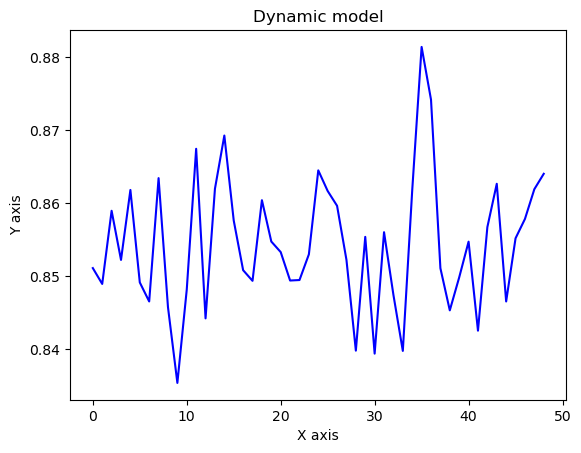

In [16]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.title("Dynamic model")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(list_of_f1_gb, color ="Blue")
plt.show()